Perform clustering of the iris dataset based on all variables using Gaussian mixture
models. Use PCA to visualize clusters.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
data = pd.read_csv('iris.csv')
x= data.iloc[:,:4]
y= data.iloc[:,-1]

In [3]:
sc =StandardScaler()
sc.fit(x)
std_array =sc.transform(x)
X = pd.DataFrame(std_array,columns = x.columns)
X

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [4]:
cluster =GaussianMixture(n_components=3)
cluster.fit(X)
y_pred =cluster.predict(X)
score = adjusted_rand_score(y,y_pred)
score

0.4606778545574202

In [5]:
from sklearn.decomposition import PCA

pca =PCA(n_components=2)
pca_array =pca.fit_transform(data.drop(['species'],axis=1))
pca_df =pd.DataFrame(pca_array,columns=["PC1","PC2"])
pca_df.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [6]:
col_code = {0:"yellow",1:"darkblue",2:"green"}
label = {0:"setosa",1:"versicolor",2:"virginica"}

pca_df["labels"]= pd.DataFrame(y_pred)
groups = pca_df.groupby('labels')

# Grouping instances based on species
groups.mean()

,PC1,PC2
labels,,
0,-2.472803,0.583341
1,1.321208,-0.095443
2,-2.715106,0.022690


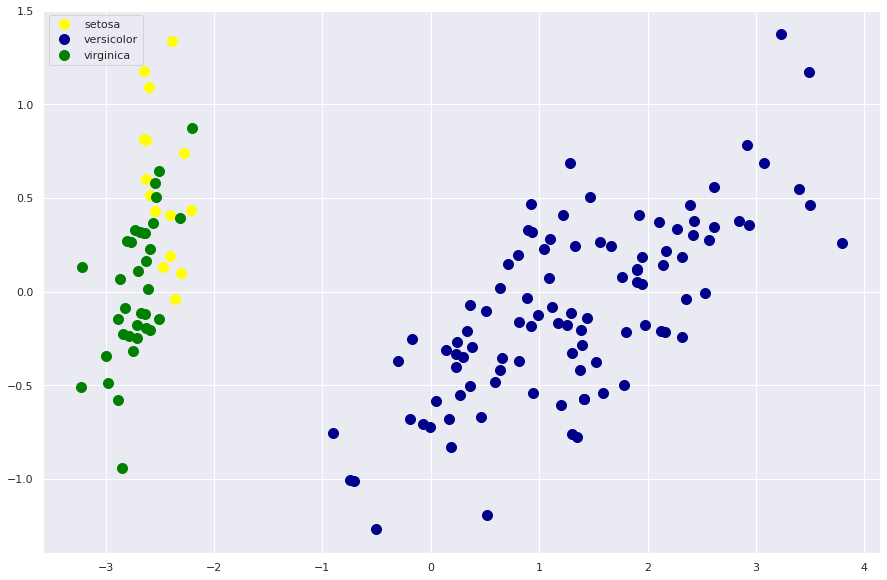

In [7]:
fig, ax =plt.subplots(1,1,figsize =(15,10))
for name, group in groups:
    ax.plot(group.PC1,group.PC2,color =col_code[name],label =label[name],marker='o',linestyle='',ms=10)
ax.legend()
plt.show()